In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction
import matplotlib as mpl

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_pickle("../../data/interim/02_outliers_removed_chauvenets.pkl")

In [ ]:
df

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.977000,-0.071000,0.013500,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,0.970500,-0.079500,-0.001500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.971667,-0.064333,0.001333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,0.957000,-0.073500,-0.024000,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,0.957667,-0.115000,-0.028000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-1.041500,-0.076500,-0.048000,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-1.030333,-0.053333,-0.037000,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-1.031000,-0.082000,-0.060000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [ ]:
predictor_columns = list(df.columns[:6])

In [ ]:
predictor_columns

['acc_y', 'acc_z', 'acc_x', 'gyr_x', 'gyr_y', 'gyr_z']

In [ ]:
mpl.style.use("fivethirtyeight")
mpl.rcParams["figure.figsize"] = (20,5)
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["lines.linewidth"] = 2

In [ ]:
subset = df[df["set"] == 35]

In [ ]:
subset

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:48:54.800,0.968500,0.034500,-0.118000,-2.5000,-2.9270,1.4270,B,ohp,medium,35
2019-01-11 15:48:55.000,0.944500,0.049500,-0.103000,2.0488,-3.0488,2.8292,B,ohp,medium,35
2019-01-11 15:48:55.200,1.021667,0.048333,-0.103333,-3.2318,-5.7682,-4.3046,B,ohp,medium,35
2019-01-11 15:48:55.400,1.509500,-0.053500,-0.230000,NaN,NaN,-53.1828,B,ohp,medium,35
2019-01-11 15:48:55.600,0.913000,-0.281667,-0.316000,-0.0976,-19.0852,-25.8170,B,ohp,medium,35
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:49:15.600,0.864667,-0.219333,-0.349000,-32.4998,-17.3416,13.2684,B,ohp,medium,35
2019-01-11 15:49:15.800,1.339000,-0.166000,-0.455000,-68.8902,-30.8780,30.4512,B,ohp,medium,35
2019-01-11 15:49:16.000,1.187333,-0.021333,-0.302000,6.5854,-8.8412,-7.7558,B,ohp,medium,35


<AxesSubplot: xlabel='epoch (ms)'>

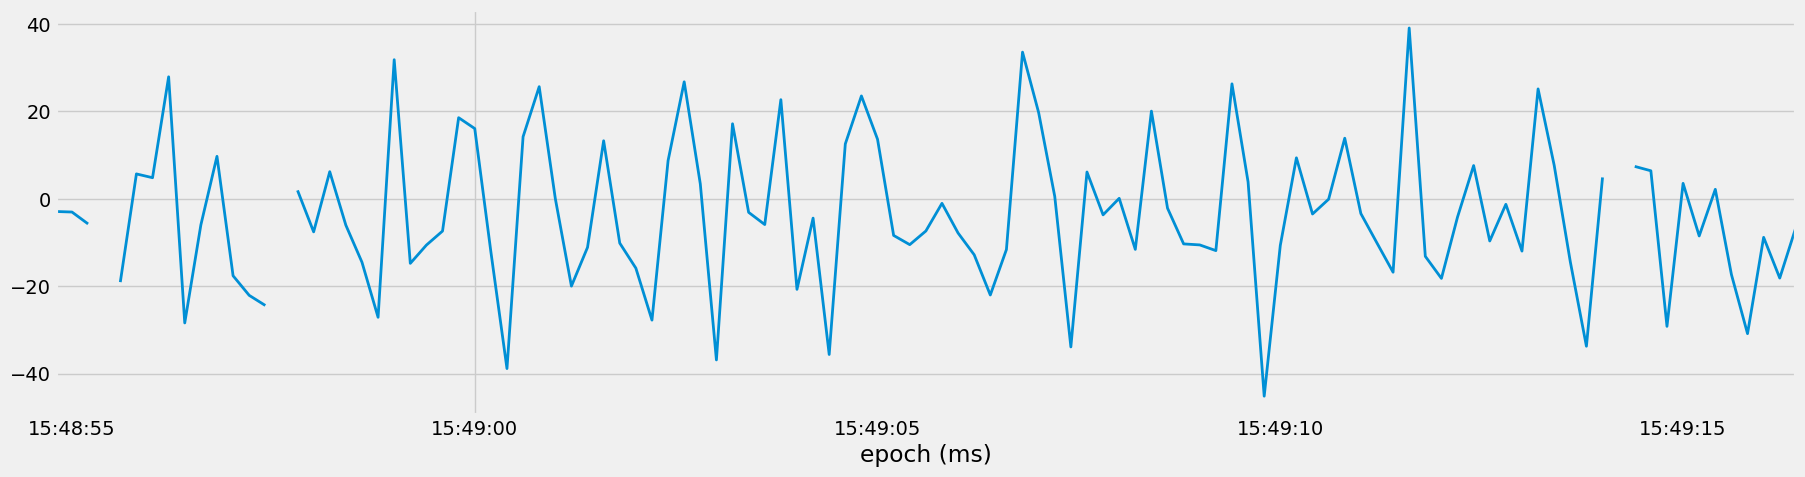

In [ ]:
subset = df[df["set"] == 35]["gyr_y"]
subset.plot()

In [ ]:
for col in predictor_columns:
    df[col] = df[col].interpolate()

<AxesSubplot: xlabel='epoch (ms)'>

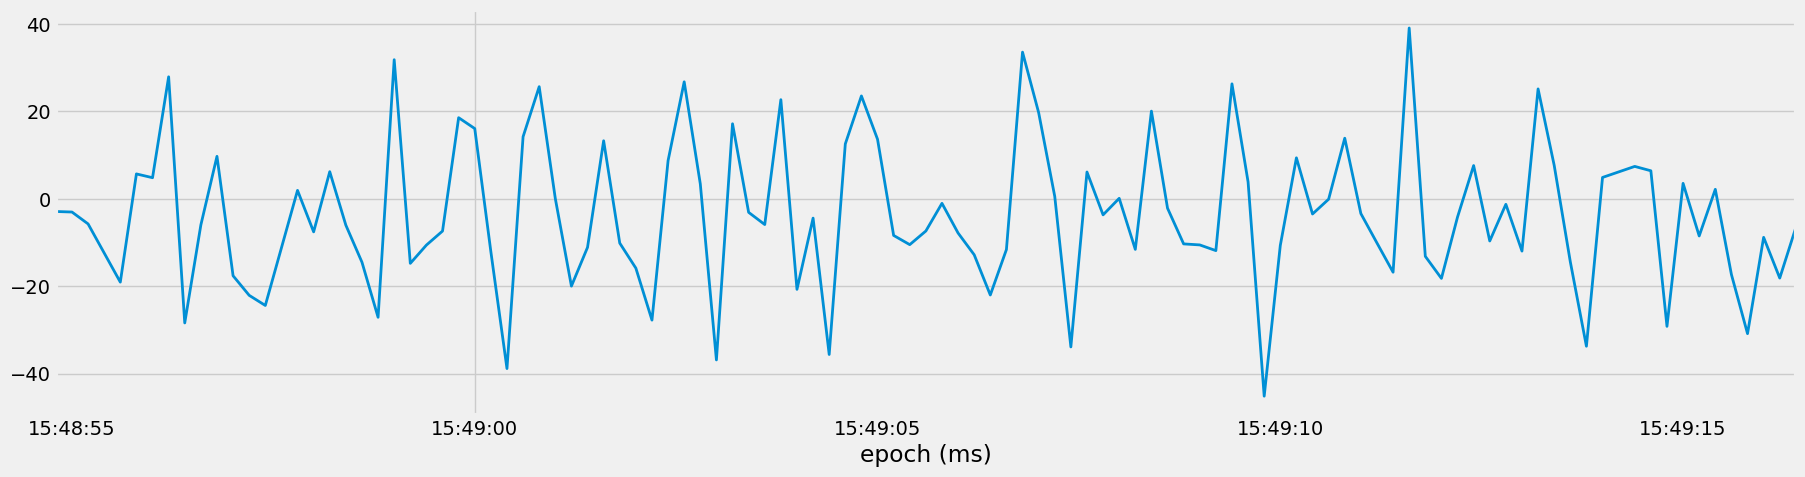

In [ ]:
subset = df[df["set"] == 35]["gyr_y"]
subset.plot()

<AxesSubplot: xlabel='epoch (ms)'>

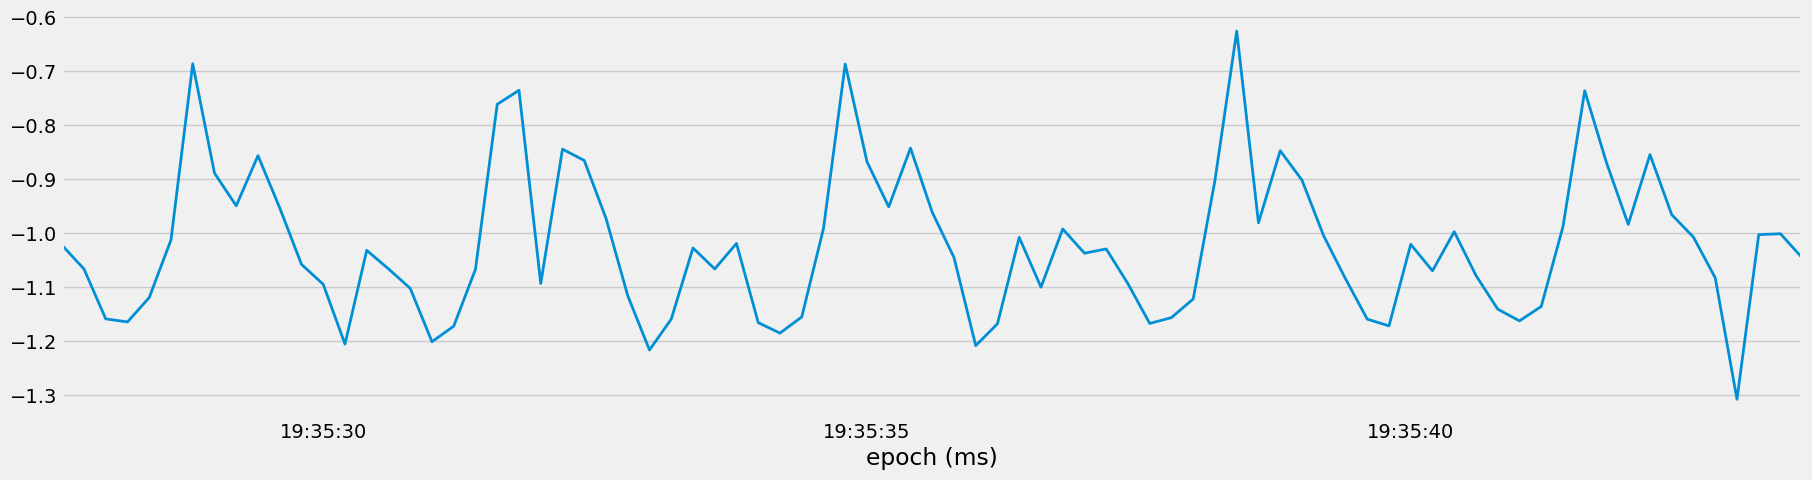

In [ ]:
df[df["set"] == 5]["acc_y"].plot()

In [ ]:
duration = df[ df["set"] == 1 ].index[-1] - df[df["set"] == 1].index[0]

In [ ]:
duration

Timedelta('0 days 00:00:16.400000')

In [ ]:
duration.seconds

16

In [ ]:
for s in df["set"].unique():
    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]
    duration = stop - start
    
    df.loc[(df["set"] == s), "duration"] = duration.seconds

In [ ]:
duration_df = df.groupby(["category"])["duration"].mean()

In [ ]:
duration_df.iloc[0] / 5

2.9487001733102254

In [ ]:
duration_df.iloc[1] / 10

2.4942528735632186

<AxesSubplot: xlabel='epoch (ms)'>

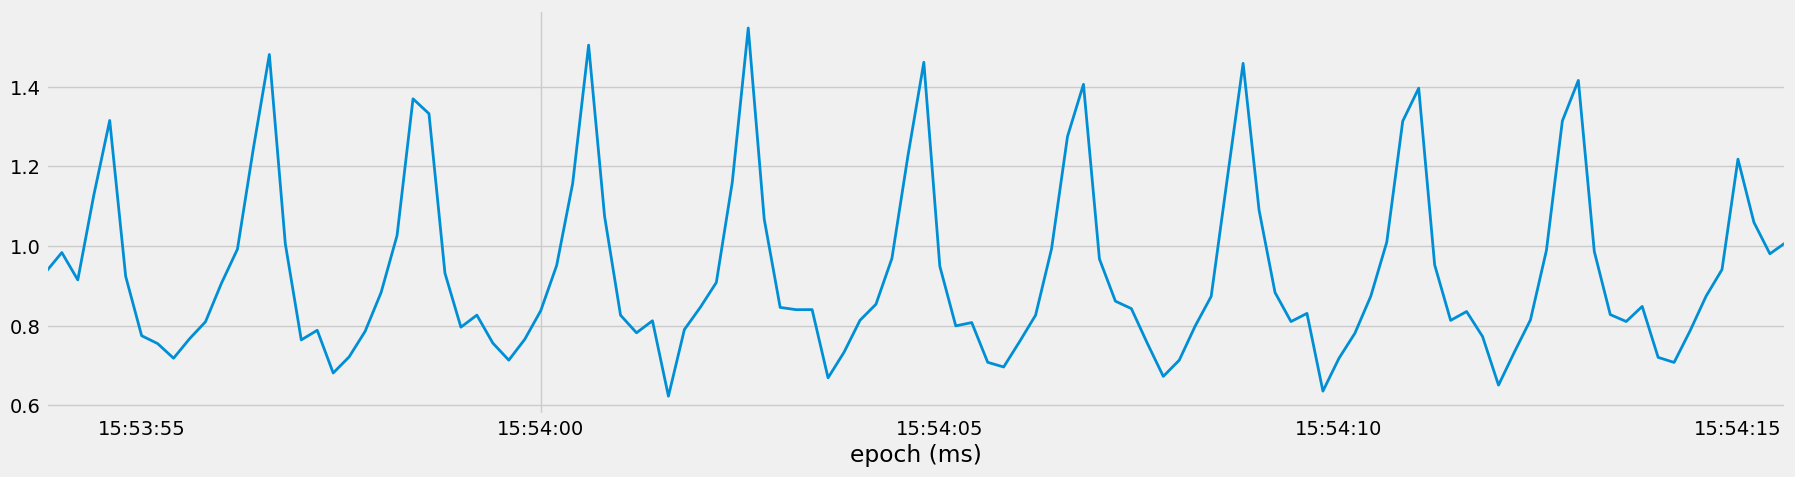

In [ ]:
df[df["set"] == 15]["acc_y"].plot()

In [ ]:
df_lowpass = df.copy()

In [ ]:
LowPass = LowPassFilter()

In [ ]:
fs = 1000 / 200

In [ ]:
fs = 1000 / 200
cutoff = 1

In [ ]:
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

In [ ]:
subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

ohp


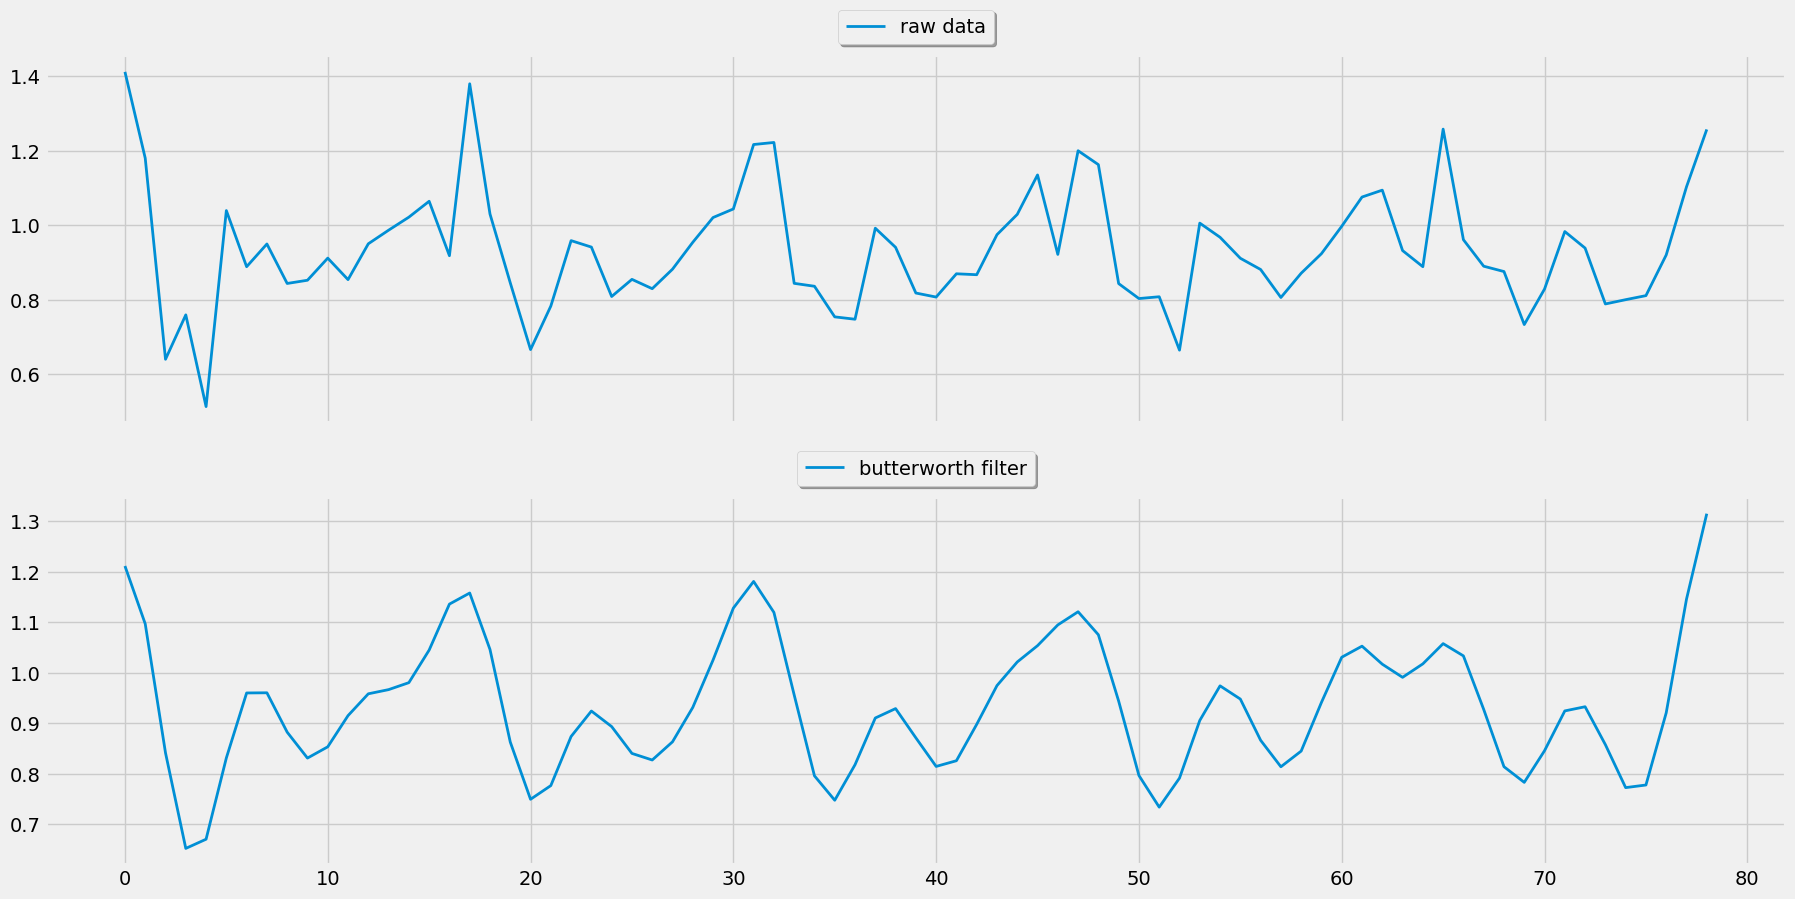

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

ohp


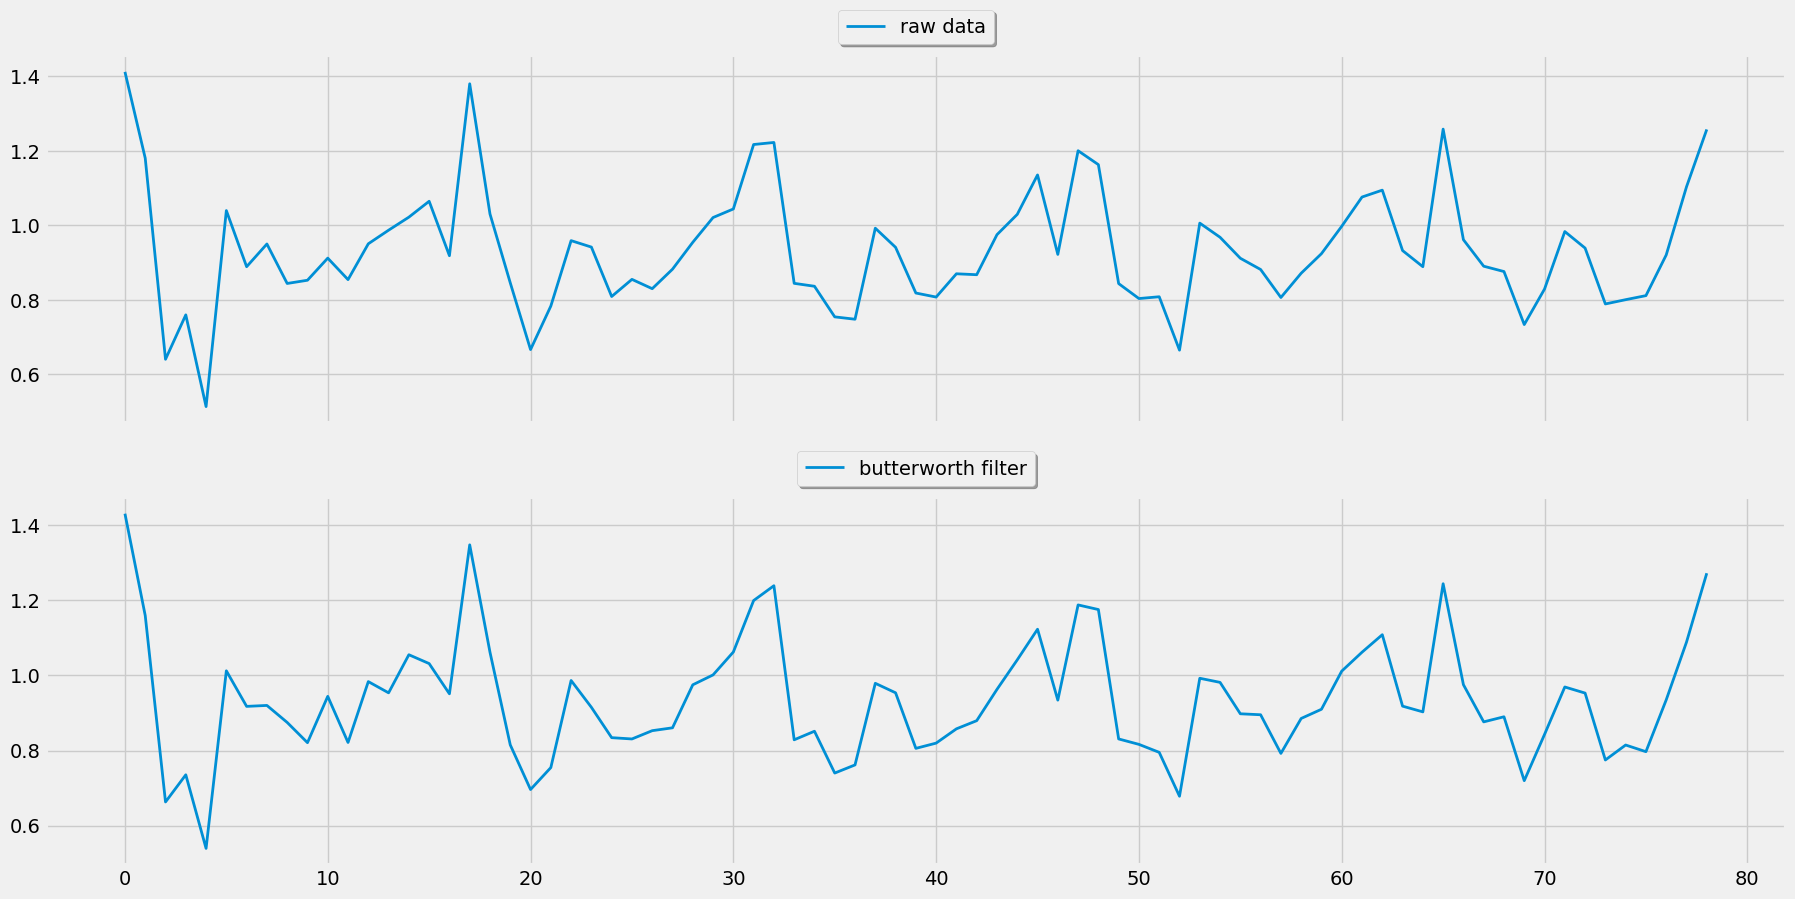

In [ ]:
cutoff = 2.4

df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

In [ ]:
# So cutoff frequency as 1 is alright

ohp


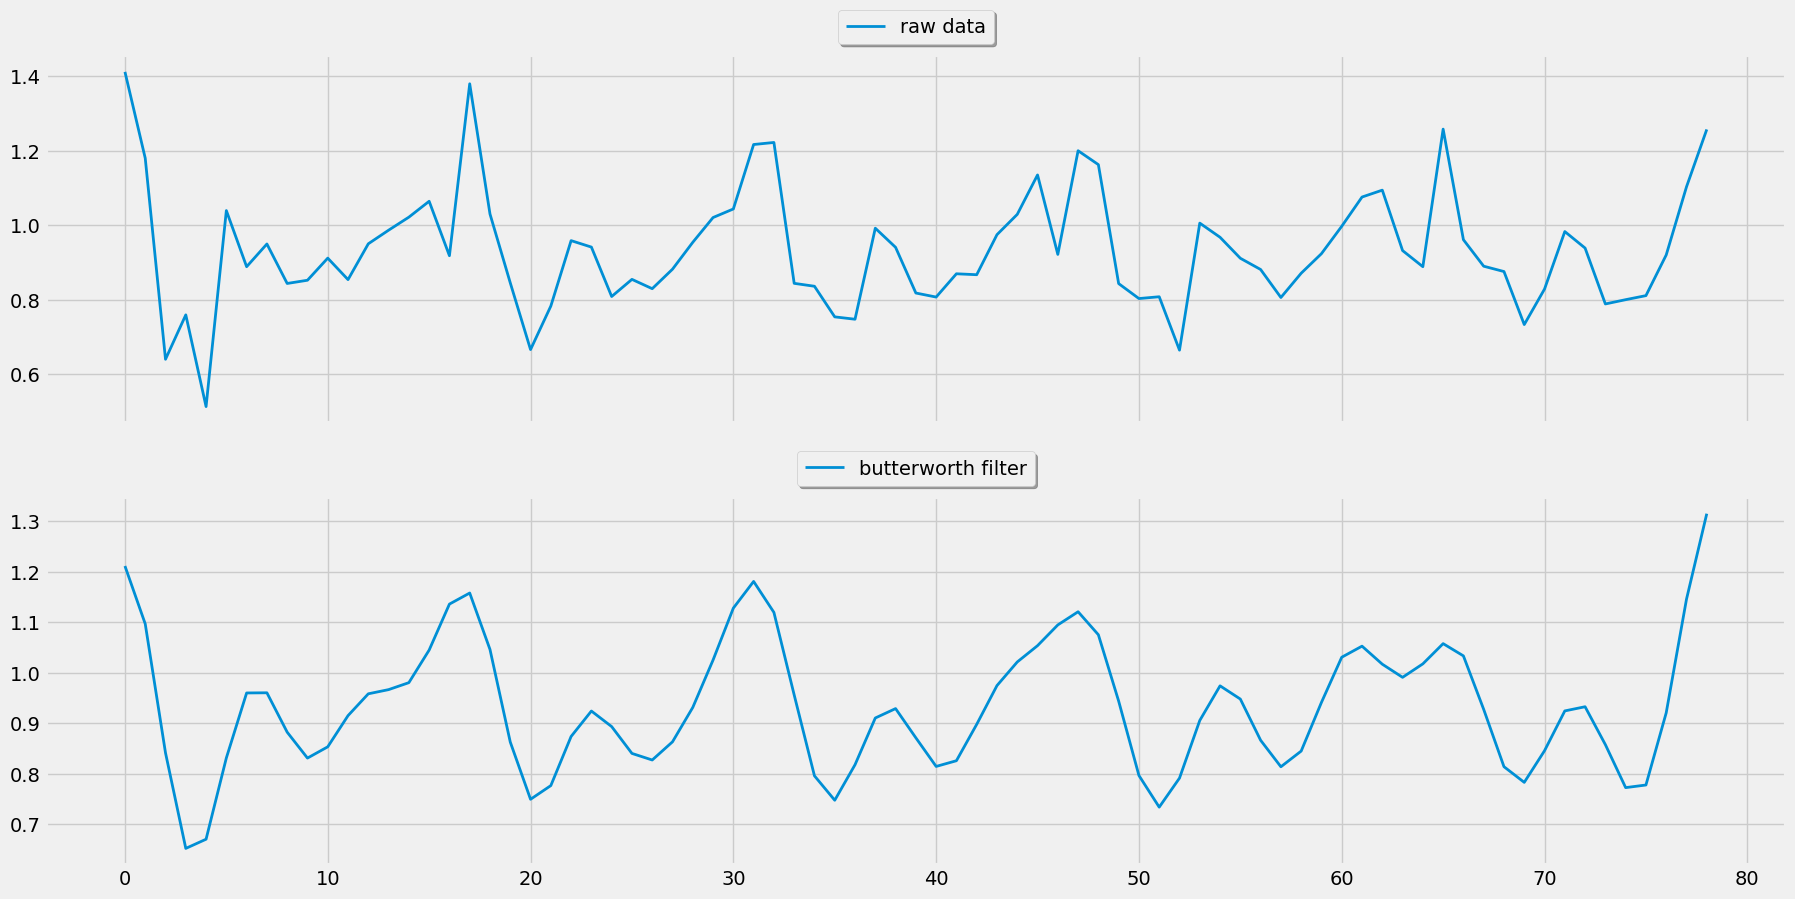

In [ ]:
cutoff = 1

df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

ohp


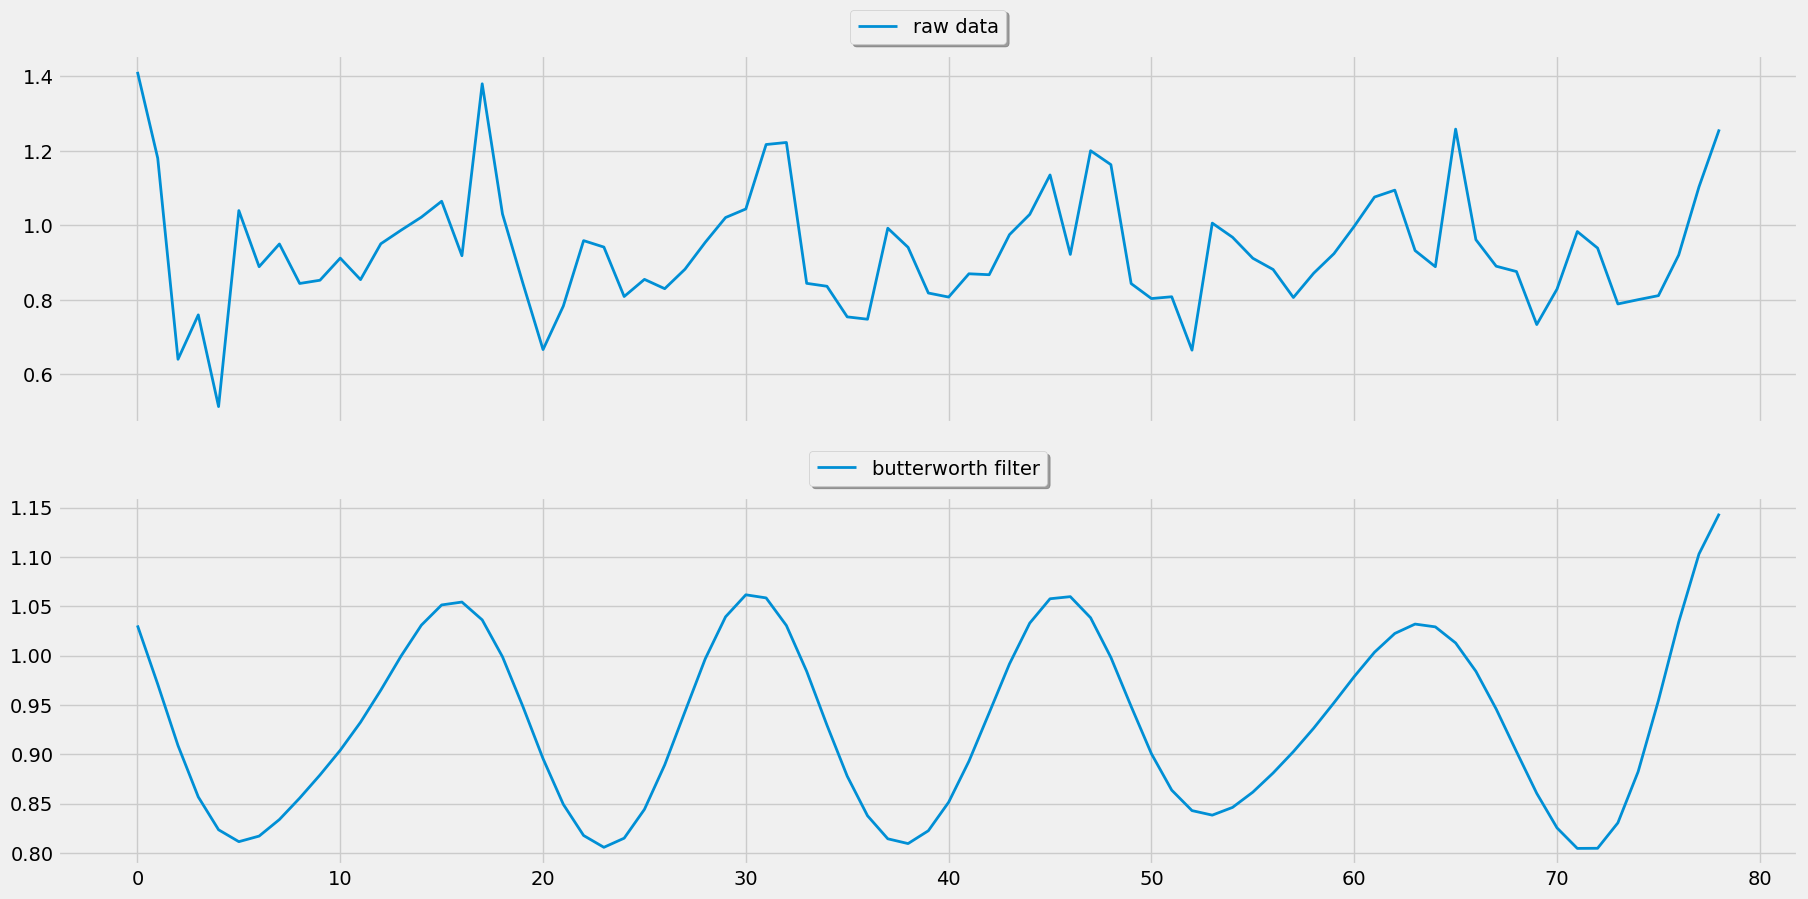

In [ ]:
cutoff = 0.5

df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

ohp


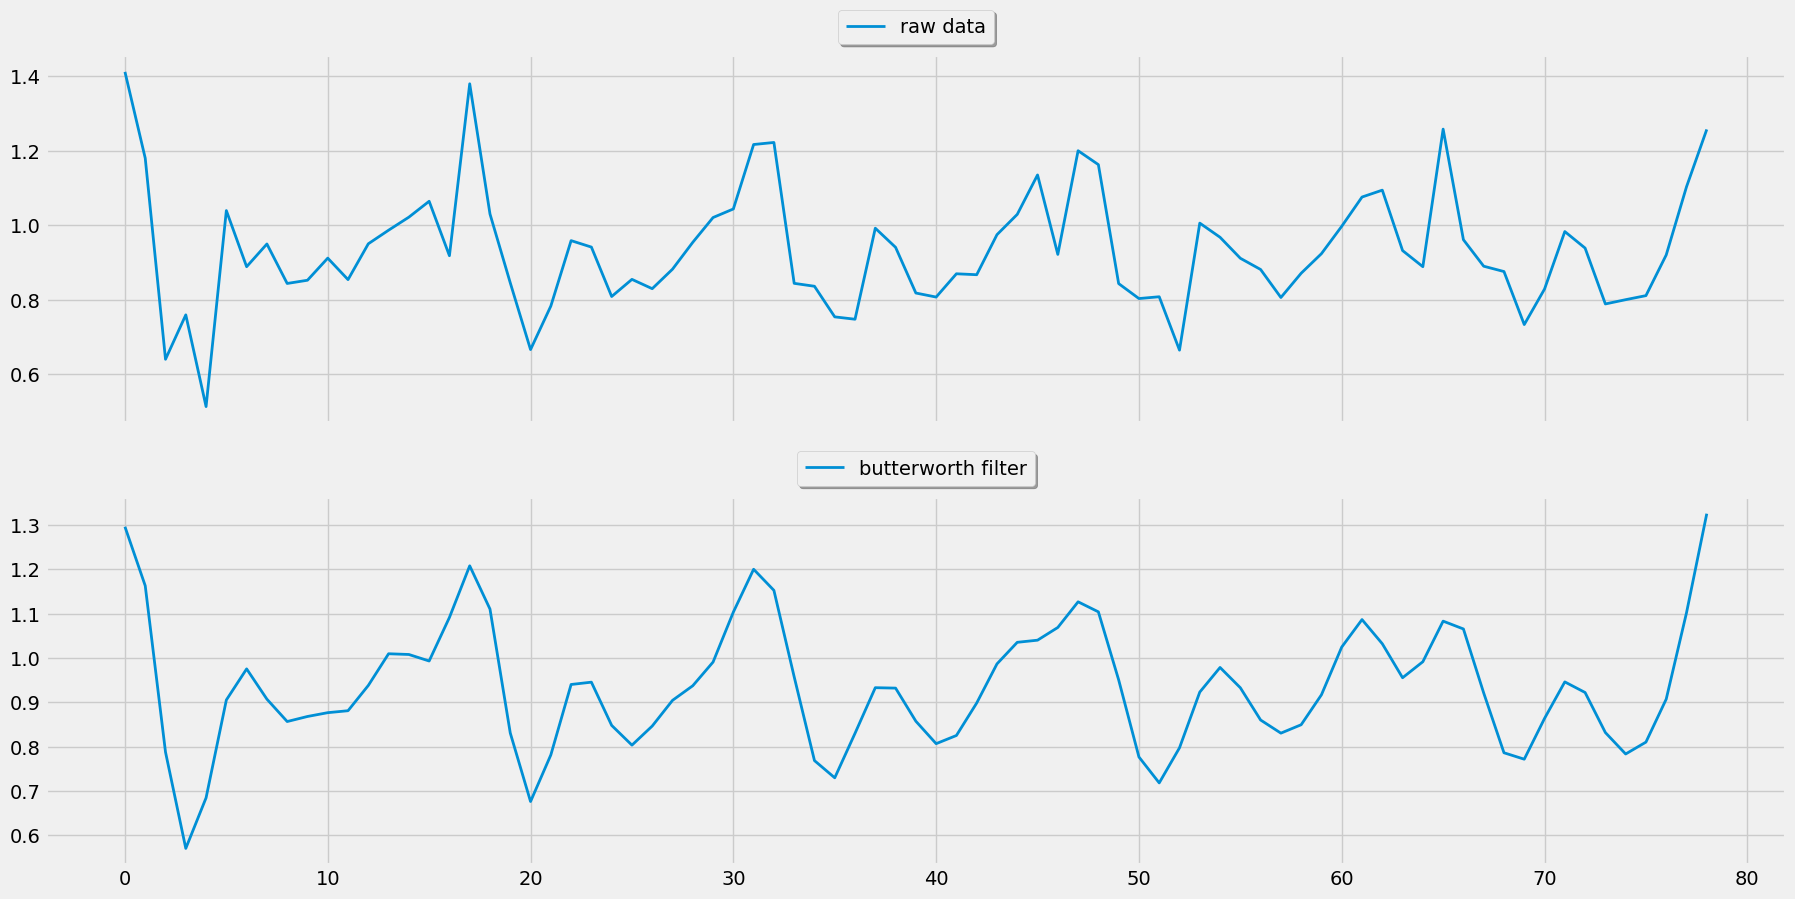

In [ ]:
cutoff = 1.3

df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)

subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

In [ ]:
# 1.3 is good

In [ ]:
df_lowpass = df.copy()

In [ ]:
fs = 1000 / 200
cutoff = 1.3

In [ ]:
for col in predictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, cutoff, order=5)
    df_lowpass[col] = df_lowpass[col+"_lowpass"]
    del df_lowpass[col+"_lowpass"]

In [ ]:
df_lowpass

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0


In [ ]:
df

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.977000,-0.071000,0.013500,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.970500,-0.079500,-0.001500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.971667,-0.064333,0.001333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,0.957000,-0.073500,-0.024000,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,0.957667,-0.115000,-0.028000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-1.041500,-0.076500,-0.048000,1.4146,-5.6218,0.2926,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-1.030333,-0.053333,-0.037000,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-1.031000,-0.082000,-0.060000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0


In [ ]:
df_pca = df_lowpass.copy()

In [ ]:
PCA = PrincipalComponentAnalysis()

In [ ]:
pc_values = PCA.determine_pc_explained_variance(df_pca, predictor_columns)

In [ ]:
pc_values

array([0.57992901, 0.27309479, 0.06509761, 0.05306529, 0.01866432,
       0.01014897])

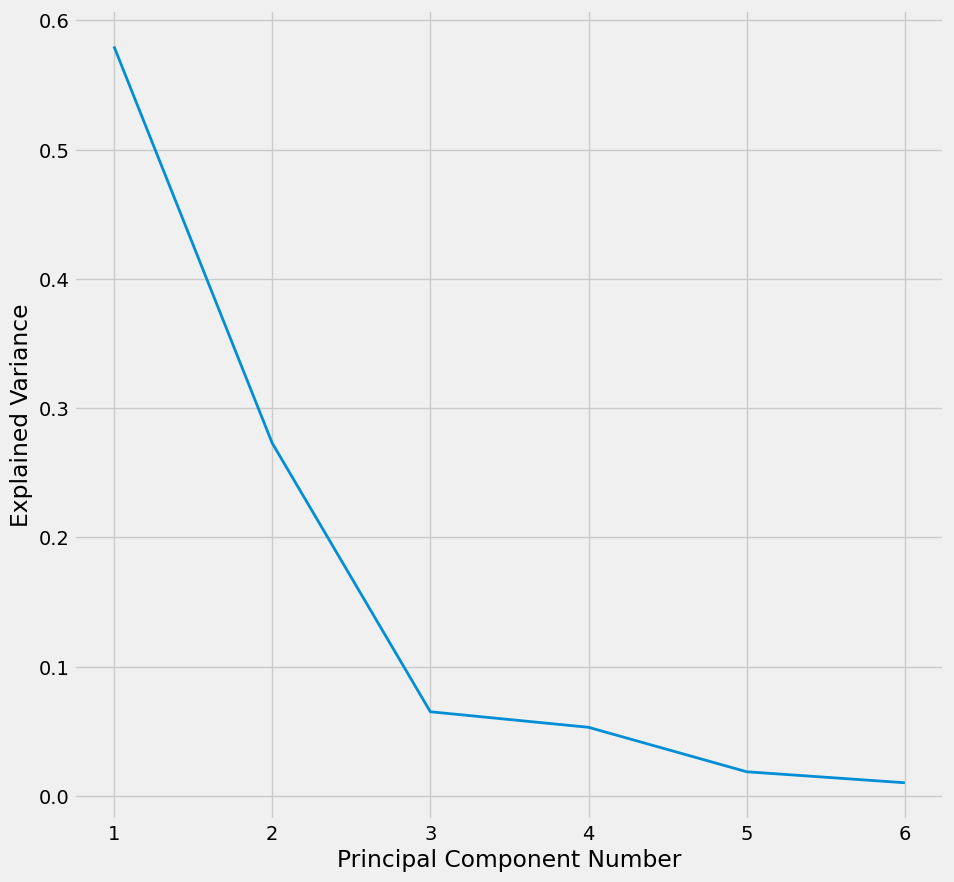

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(range(1,len(predictor_columns)+1), pc_values,)
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance")
plt.show()

In [ ]:
df_pca = PCA.apply_pca(df_pca, predictor_columns, 3)

In [ ]:
df_pca

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.315889,-0.075461,0.072243
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.314873,-0.073888,0.069825
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.314236,-0.080343,0.066219
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.314356,-0.090852,0.061839
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.313630,-0.097479,0.062974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.349351,-0.148450,-0.053031
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.371610,-0.151455,-0.058498
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.368098,-0.153153,-0.058772


In [ ]:
subset = df_pca[df_pca["set"] == 35]

In [ ]:
subset

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:48:54.800,0.891041,-0.005994,-0.094396,-2.338054,-3.884629,1.745296,B,ohp,medium,35,21.0,-0.294343,-0.059385,0.003727
2019-01-11 15:48:55.000,0.953323,0.080001,-0.093845,-3.814675,-2.375120,4.447539,B,ohp,medium,35,21.0,-0.313398,-0.006771,-0.013395
2019-01-11 15:48:55.200,1.182284,0.049543,-0.133457,0.341722,-5.827977,-14.474650,B,ohp,medium,35,21.0,-0.395533,-0.023779,-0.008200
2019-01-11 15:48:55.400,1.266713,-0.097444,-0.214620,1.836545,-15.200894,-38.378502,B,ohp,medium,35,21.0,-0.435004,-0.121345,-0.004419
2019-01-11 15:48:55.600,1.034657,-0.229331,-0.297162,-8.084908,-15.295883,-34.485185,B,ohp,medium,35,21.0,-0.366605,-0.220814,-0.031165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:49:15.600,0.948756,-0.227174,-0.351624,-20.037197,-17.034945,1.458312,B,ohp,medium,35,21.0,-0.342327,-0.231862,-0.072531
2019-01-11 15:49:15.800,1.266271,-0.151429,-0.424993,-47.826553,-23.376297,24.493841,B,ohp,medium,35,21.0,-0.455707,-0.189263,-0.127620
2019-01-11 15:49:16.000,1.171543,-0.035990,-0.335881,-28.663875,-19.242887,14.107873,B,ohp,medium,35,21.0,-0.412323,-0.109535,-0.104000


In [ ]:
subset = df_pca[df_pca["set"] == 24]

In [ ]:
subset

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-15 19:04:09.000,0.191670,0.577847,0.234651,3.046163,-5.763040,1.459905,A,squat,heavy,24,16.0,-0.012614,0.315330,-0.009703
2019-01-15 19:04:09.200,0.698563,0.833300,0.312534,6.652688,-4.156916,0.302384,A,squat,heavy,24,16.0,-0.172140,0.495860,-0.003255
2019-01-15 19:04:09.400,0.670374,0.797067,0.298160,7.540794,-3.299456,-1.445354,A,squat,heavy,24,16.0,-0.164662,0.471194,-0.002315
2019-01-15 19:04:09.600,0.528925,0.679955,0.264481,6.956495,-3.911643,-1.533207,A,squat,heavy,24,16.0,-0.122324,0.391915,0.001058
2019-01-15 19:04:09.800,0.553099,0.647834,0.264063,1.233356,-4.045345,0.391315,A,squat,heavy,24,16.0,-0.131541,0.373936,0.005320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15 19:04:25.000,0.511846,0.610778,0.303524,-6.832672,-2.033753,4.819261,A,squat,heavy,24,16.0,-0.115170,0.357852,0.023707
2019-01-15 19:04:25.200,0.559722,0.701214,0.356233,-3.613639,-3.436709,1.005534,A,squat,heavy,24,16.0,-0.124572,0.421529,0.032342
2019-01-15 19:04:25.400,0.574950,0.759783,0.374103,8.728911,-5.392049,-1.481455,A,squat,heavy,24,16.0,-0.126465,0.459271,0.036503


In [ ]:
subset = df_pca[df_pca["set"] == 35]

<AxesSubplot: xlabel='epoch (ms)'>

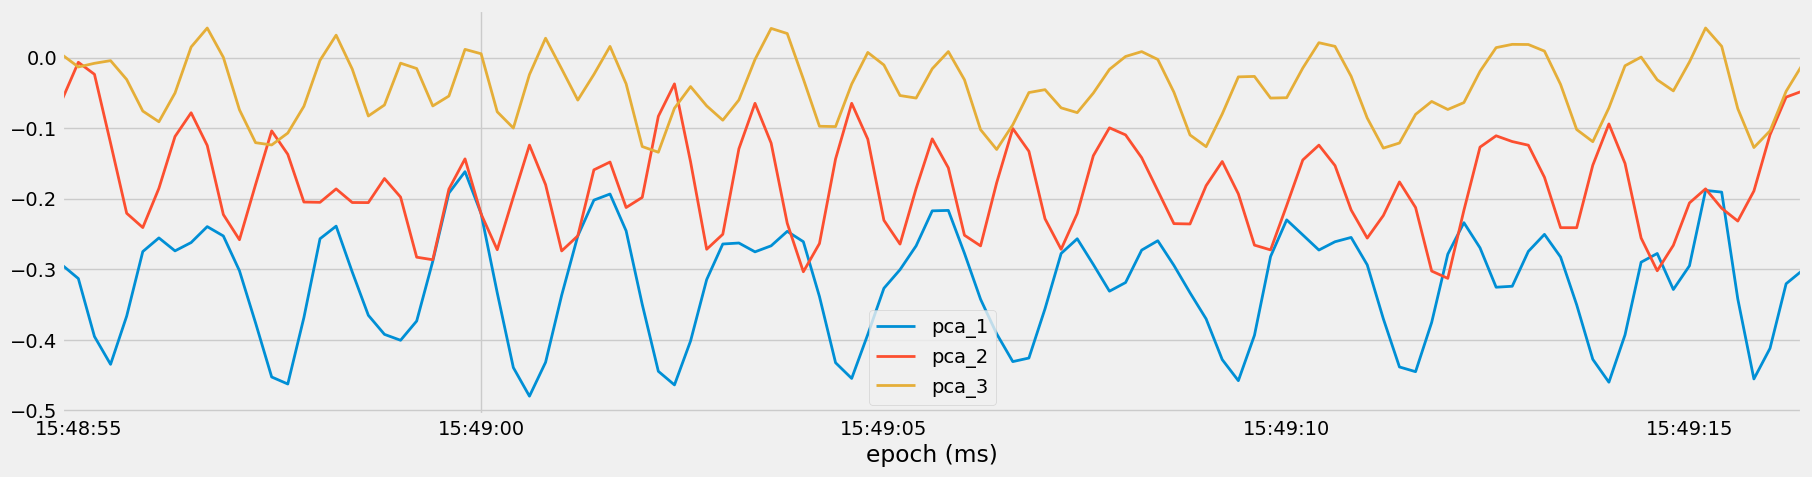

In [ ]:
subset[["pca_1", "pca_2", "pca_3"]].plot()

In [ ]:
subset = df_pca[df_pca["set"] == 24]

<AxesSubplot: xlabel='epoch (ms)'>

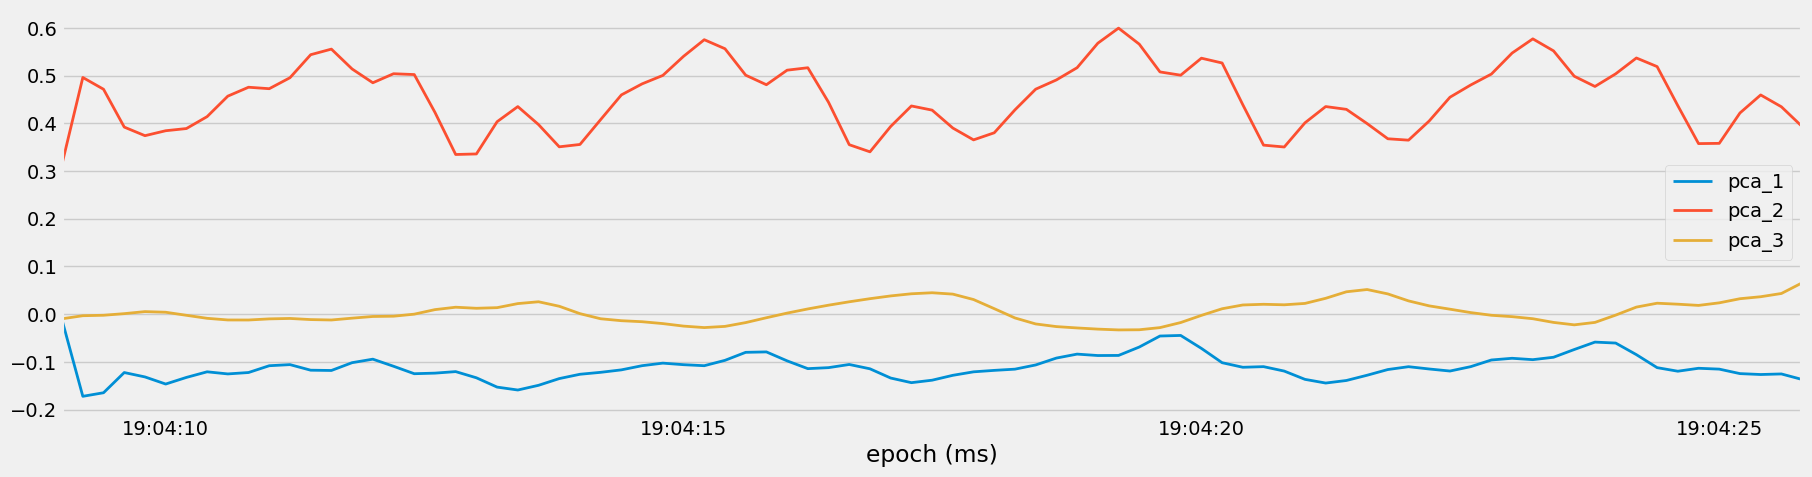

In [ ]:
subset[["pca_1", "pca_2", "pca_3"]].plot()

<AxesSubplot: xlabel='epoch (ms)'>

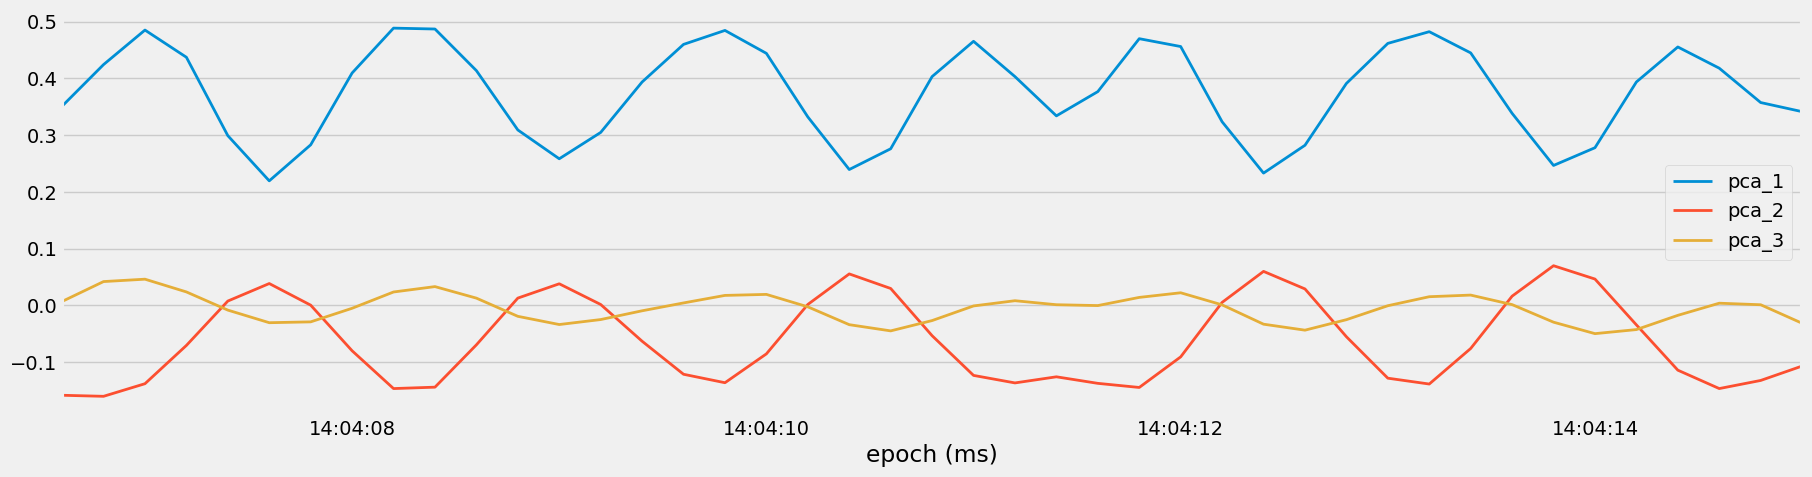

In [ ]:
subset = df_pca[df_pca["set"] == 22]

subset[["pca_1", "pca_2", "pca_3"]].plot()

In [ ]:
df_squared = df_pca.copy()

In [ ]:
acc_r = (df_squared["acc_x"]**2) + (df_squared["acc_y"]**2) + (df_squared["acc_z"]**2) 
gyr_r = (df_squared["gyr_x"]**2) + (df_squared["gyr_y"]**2) + (df_squared["gyr_z"]**2)

In [ ]:
acc_r

epoch (ms)
2019-01-11 15:08:05.200    0.959758
2019-01-11 15:08:05.400    0.951550
2019-01-11 15:08:05.600    0.940095
2019-01-11 15:08:05.800    0.933694
2019-01-11 15:08:06.000    0.930633
                             ...   
2019-01-20 17:33:27.000    0.982231
2019-01-20 17:33:27.200    1.115630
2019-01-20 17:33:27.400    1.098133
2019-01-20 17:33:27.600    1.027507
2019-01-20 17:33:27.800    1.076688
Length: 9009, dtype: float64

In [ ]:
gyr_r

epoch (ms)
2019-01-11 15:08:05.200    10.384526
2019-01-11 15:08:05.400     0.360211
2019-01-11 15:08:05.600    24.492348
2019-01-11 15:08:05.800    34.847803
2019-01-11 15:08:06.000     5.260569
                             ...    
2019-01-20 17:33:27.000    20.328548
2019-01-20 17:33:27.200    18.397341
2019-01-20 17:33:27.400     5.426886
2019-01-20 17:33:27.600    15.173048
2019-01-20 17:33:27.800    18.335044
Length: 9009, dtype: float64

In [ ]:
df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
df_squared

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.368098,-0.153153,-0.058772,1.047919,2.329568


In [ ]:
subset = df_squared[df_squared["set"] == 18]

In [ ]:
subset

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-18 17:22:26.000,0.178588,-0.158717,0.754393,1.542044,-1.598563,0.872745,A,rest,sitting,18,33.0,0.018389,-0.025226,0.390511,0.791324,2.386417
2019-01-18 17:22:26.200,-0.144903,-0.193405,1.054342,3.306557,3.319560,0.493782,A,rest,sitting,18,33.0,0.153859,-0.004242,0.519528,1.081684,4.711328
2019-01-18 17:22:26.400,-0.122968,-0.178639,1.033674,1.108897,2.959040,1.350801,A,rest,sitting,18,33.0,0.144909,0.001559,0.506381,1.056180,3.436602
2019-01-18 17:22:26.600,-0.029613,-0.151857,0.949323,-1.500770,-4.028636,0.486921,A,rest,sitting,18,33.0,0.106362,0.005565,0.465037,0.961848,4.326582
2019-01-18 17:22:26.800,-0.054056,-0.142872,0.978181,4.253977,-0.901537,-1.735733,A,rest,sitting,18,33.0,0.117567,0.015041,0.478981,0.990036,4.682078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-18 17:22:59.000,-0.196928,0.116640,0.996179,41.727877,-7.841397,-20.131505,A,rest,sitting,18,33.0,0.175205,0.164509,0.448285,1.022134,46.989155
2019-01-18 17:22:59.200,-0.137298,0.121193,0.919062,61.765530,21.902857,-2.517205,A,rest,sitting,18,33.0,0.148827,0.156462,0.426957,0.937131,65.582408
2019-01-18 17:22:59.400,-0.337650,0.162960,0.882677,35.967573,48.404560,63.848442,A,rest,sitting,18,33.0,0.214413,0.168756,0.367048,0.959000,87.825346


In [ ]:
subset = df_squared[df_squared["set"] == 14]

In [ ]:
subset

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-14 13:55:42.600,1.363893,-0.232202,-0.108844,9.383811,1.897146,-25.433289,A,ohp,heavy,14,14.0,-0.462139,-0.177939,0.082722,1.387792,27.175490
2019-01-14 13:55:42.800,1.135894,-0.287747,-0.237128,18.257195,5.938479,-45.219659,A,ohp,heavy,14,14.0,-0.396694,-0.240701,0.033224,1.195526,49.126452
2019-01-14 13:55:43.000,0.863365,-0.246855,-0.327636,4.211681,2.673518,-26.124145,A,ohp,heavy,14,14.0,-0.310975,-0.241889,-0.042364,0.955867,26.596182
2019-01-14 13:55:43.200,0.776706,-0.208875,-0.349145,-20.546628,1.904198,5.720663,A,ohp,heavy,14,14.0,-0.282959,-0.226135,-0.084842,0.876814,21.412984
2019-01-14 13:55:43.400,0.826404,-0.185784,-0.312218,-26.013082,2.040092,26.809748,A,ohp,heavy,14,14.0,-0.296276,-0.204360,-0.076541,0.902740,37.411295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:55:56.600,1.129268,-0.148716,-0.197104,-18.452865,-14.406862,38.427667,A,ohp,heavy,14,14.0,-0.388505,-0.152617,-0.013487,1.155946,44.997239
2019-01-14 13:55:56.800,1.158114,-0.096057,-0.110220,4.436677,-5.767057,5.849225,A,ohp,heavy,14,14.0,-0.388880,-0.105712,0.034376,1.167306,9.335764
2019-01-14 13:55:57.000,1.011026,-0.089745,-0.114312,2.393365,1.783427,-16.470421,A,ohp,heavy,14,14.0,-0.338920,-0.107651,0.024705,1.021418,16.738685


<AxesSubplot: xlabel='epoch (ms)'>

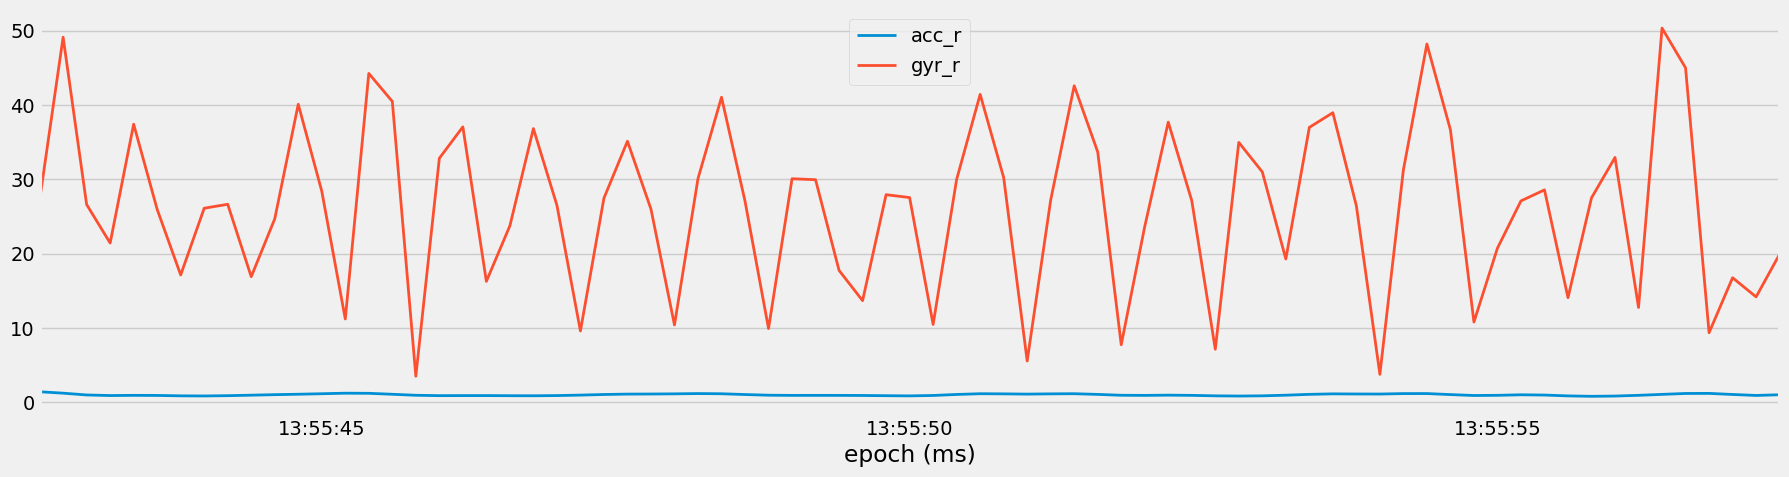

In [ ]:
subset[["acc_r","gyr_r"]].plot()

array([<AxesSubplot: xlabel='epoch (ms)'>,
       <AxesSubplot: xlabel='epoch (ms)'>], dtype=object)

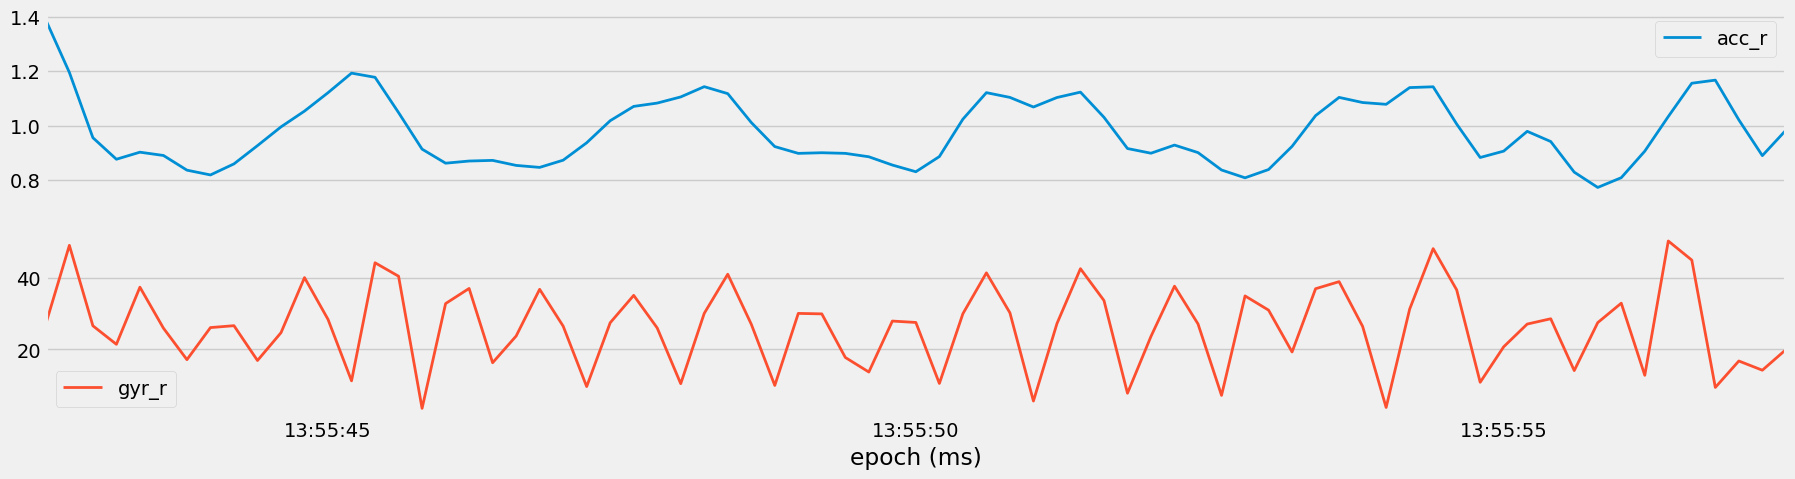

In [ ]:
subset[["acc_r","gyr_r"]].plot(subplots=True)

In [ ]:
subset = df_squared[df_squared["set"] == 22]

array([<AxesSubplot: xlabel='epoch (ms)'>,
       <AxesSubplot: xlabel='epoch (ms)'>], dtype=object)

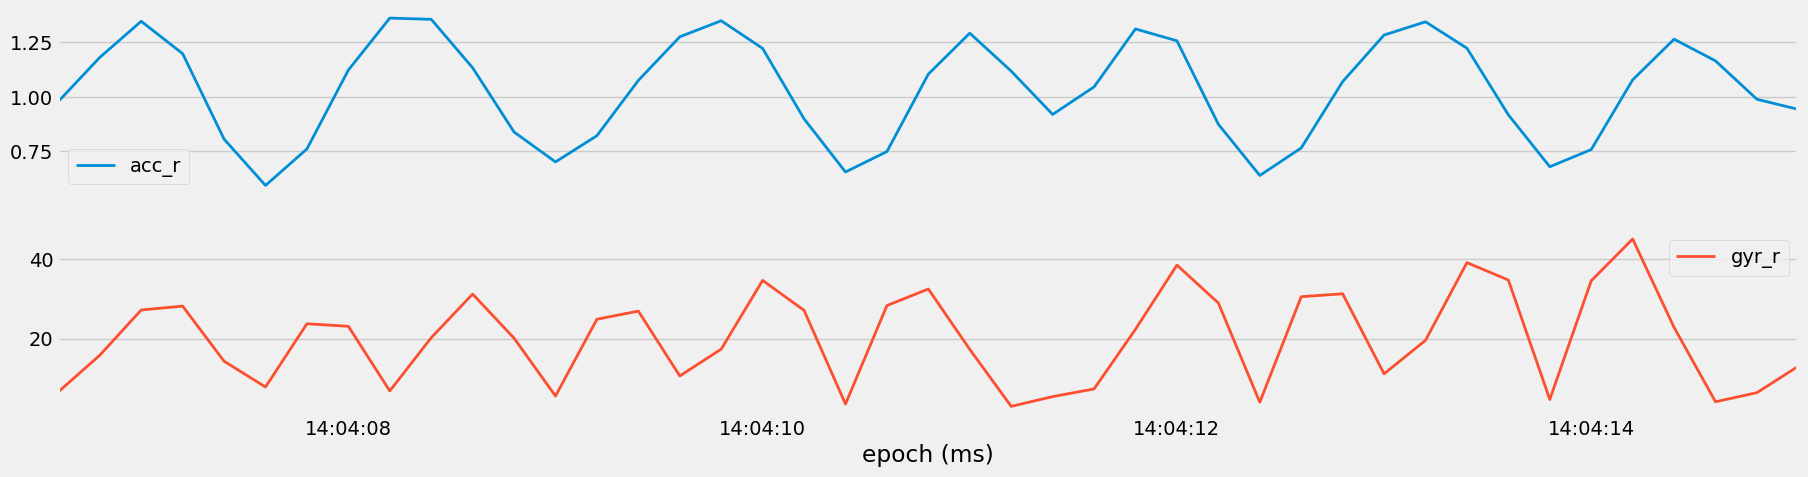

In [ ]:
subset[["acc_r","gyr_r"]].plot(subplots=True)

In [ ]:
df_squared

,acc_y,acc_z,acc_x,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.977003,-0.071001,0.013503,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,-0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.973169,-0.066481,0.008515,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,-0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,0.966879,-0.071895,-0.008450,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,-0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,0.962244,-0.084774,-0.024359,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,-0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,0.959572,-0.096776,-0.022092,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,-0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.988153,-0.062545,-0.043276,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-1.053448,-0.064530,-0.041403,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-1.044737,-0.065951,-0.048048,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,0.368098,-0.153153,-0.058772,1.047919,2.329568
